In [20]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

# Load the Data

In [2]:
comments = pd.read_csv("data/synthetic_comments.csv")
comments['Dominance'] = comments['Dominance'].fillna("None")
comments = comments.loc[comments.text.notna()]
comments.Dominance = comments.Dominance.astype('category')
comments['var'] = comments['var'].astype('category')

comments.Dominance = comments.Dominance.cat.rename_categories(
    {
        "Substance" : "Substance Misuse", 
        "Agriculture": "Agriculture", 
        "Education": "Education", 
        "Health": "Health and Healthcare", 
        "OpenSpace": "Open Space", 
        "Quality": "Quality of Life", 
        "Economy": "Economy and Employment",
        "Peace": "Peace and Quiet", 
        "Retail": "Retail and Business", 
        "Negative": "No Value or Negative", 
        "LocalOpp": "Local Opportunities", 
        "Other": "Other", 
        "Environment": "Environment and Resources", 
        "None": "Nothing or Unsure", 
        "Nature": "Nature and Beauty", 
        "Housing": "Housing", 
        "Location": "Location", 
        "Safety": "Safety", 
        "Recreation": "Recreation and Tourism", 
        "Government": "Govenment", 
        "Character": "City/Town Character", 
        "Growth": "Growth and Development", 
        "Social": "Social Climate", 
        "Transportation": "Transportation"
    }
)

comments['var'] = comments['var'].cat.rename_categories(
    {
        "AboutWellbeing_OPEN": "Is there anything else you’d like to tell us about wellbeing in [your city]?",
        "ImproveWB_Open": "Is there anything that could be done to improve wellbeing in [your city]?",
        "ValueMost_OPEN": "What do you value most about living in [your city]?"
    }
)

comments.columns

Index(['City', 'Cluster4', 'var', 'text', 'Dominance', 'Transportation'], dtype='object')

# Overall Distribution of Classes

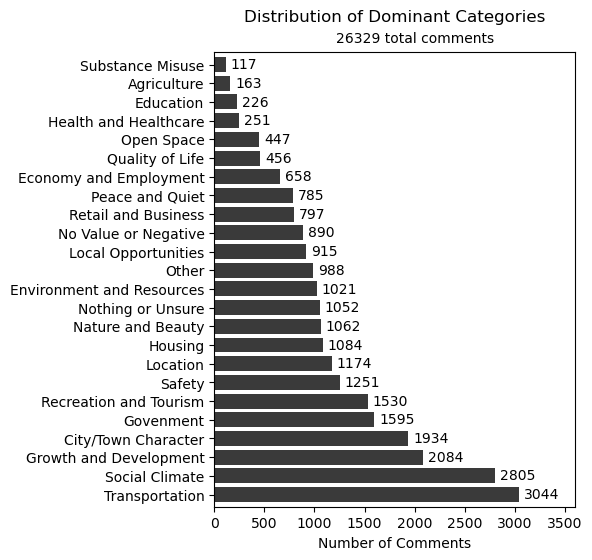

In [3]:
plt.figure(figsize=(6, 6))
dominance_counts = comments['Dominance'].value_counts()
ax = dominance_counts.plot.barh(color="#3A3A3A", width=0.8)

plt.title("Distribution of Dominant Categories", y = 1.05)
plt.suptitle(f"{len(comments.Dominance)} total comments", fontsize=10, y = 0.89, x = 0.7)
plt.xlabel("Number of Comments")
plt.ylabel("")
plt.xlim(0, 3600)

for index, value in enumerate(dominance_counts):
    plt.text(value + 50, index, str(value), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Overall Length of comments

Comments over 100 cwords:  387


Text(102, 150, '*342 Reponses had 100+ words')

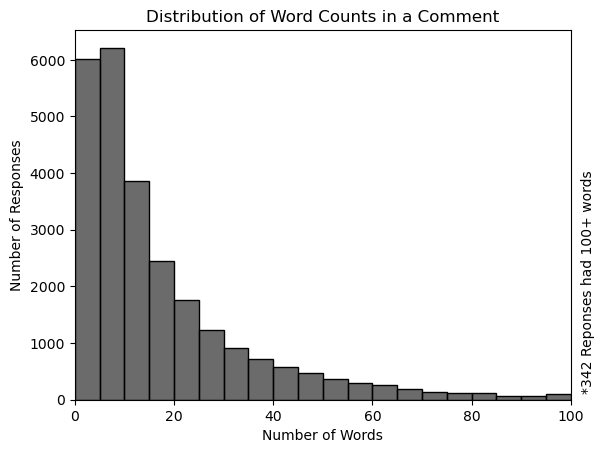

In [4]:
word_counts = np.array([len(comment.split()) for comment in comments.text])
print("Comments over 100 cwords: ", sum(word_counts > 100))
word_counts_filtered = word_counts[word_counts <= 100]
sns.histplot(word_counts_filtered, color="#3A3A3A", binwidth=5, binrange=(0, 100))
plt.xlim(0, 100)
plt.title("Distribution of Word Counts in a Comment")
plt.xlabel("Number of Words")
plt.ylabel("Number of Responses")
plt.text(102, 150, "*342 Reponses had 100+ words", ha='left', fontsize=10, color='black', rotation=90)

# Proportion of Categories By City and Question

## Improve Wellbeing

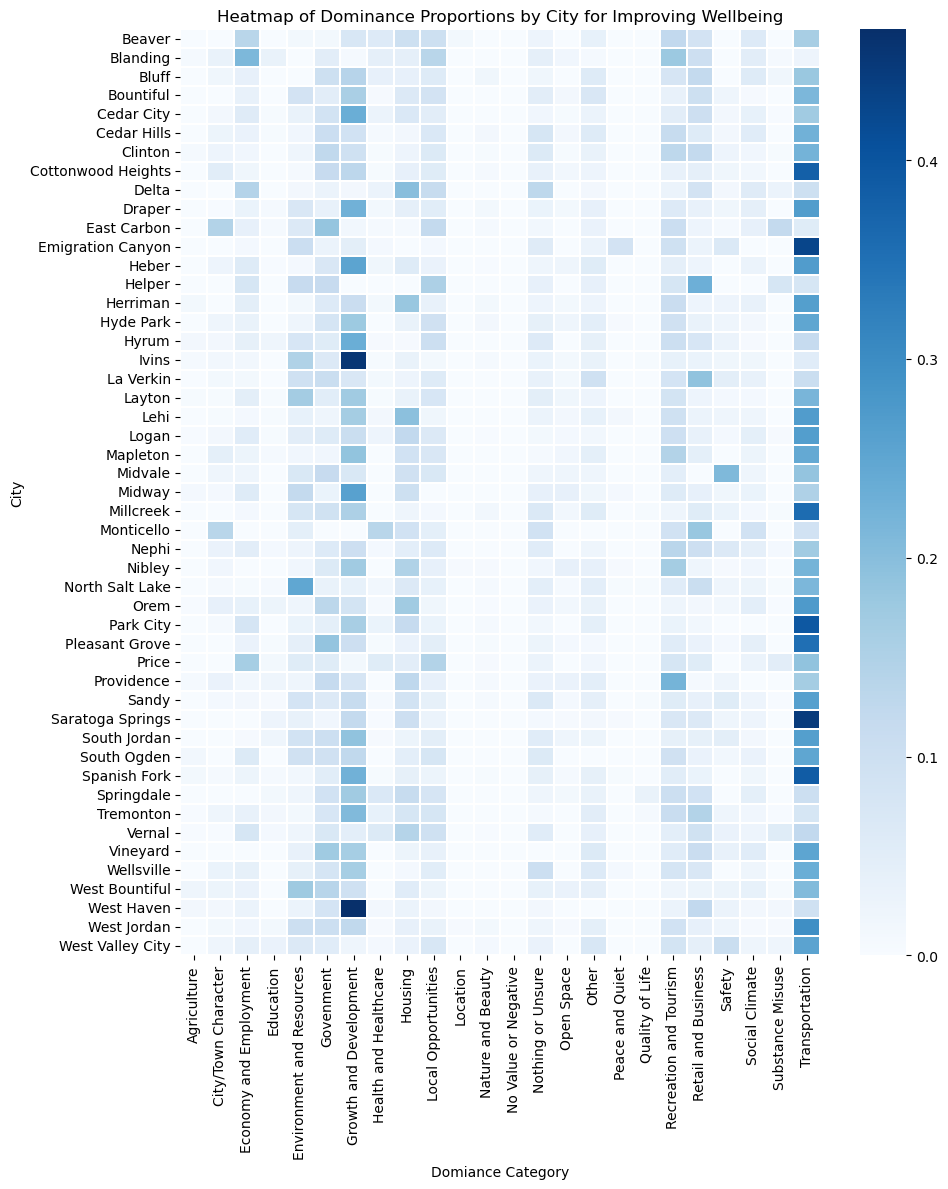

In [5]:
question_counts = comments.groupby(['var', 'City']).value_counts(['Dominance'], normalize=True).reset_index()
question_counts.columns = ['var', 'City', 'Dominance', 'text', 'proportion']
question_counts_improve = question_counts.loc[question_counts['var'] == "Is there anything that could be done to improve wellbeing in [your city]?", :]
heatmap_data_improve = question_counts_improve.pivot_table(index='City', columns='Dominance', values='proportion', aggfunc='sum')

plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data_improve, cmap='Blues', linewidths=0.1)
plt.title("Heatmap of Dominance Proportions by City for Improving Wellbeing")
plt.xlabel("Domiance Category")
plt.ylabel("City")
plt.tight_layout()
plt.show()

## Value Most

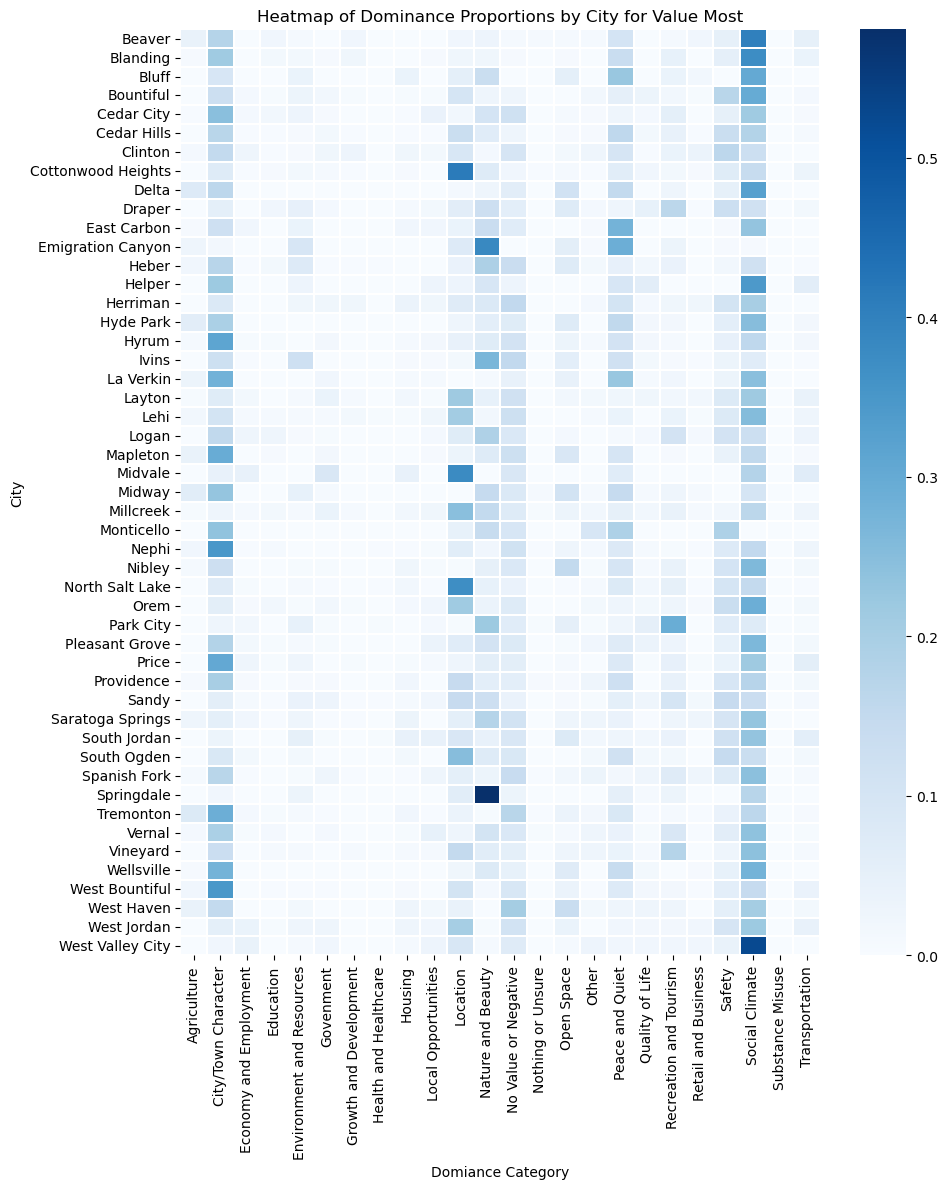

In [6]:
question_counts = comments.groupby(['var', 'City']).value_counts(['Dominance'], normalize=True).reset_index()
question_counts.columns = ['var', 'City', 'Dominance', 'text', 'proportion']
question_counts_value = question_counts.loc[question_counts['var'] == "What do you value most about living in [your city]?", :]
heatmap_data_value = question_counts_value.pivot_table(index='City', columns='Dominance', values='proportion', aggfunc='sum')

plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data_value, cmap='Blues', linewidths=0.1)
plt.title("Heatmap of Dominance Proportions by City for Value Most")
plt.xlabel("Domiance Category")
plt.ylabel("City")
plt.tight_layout()
plt.show()

## About Wellbeing

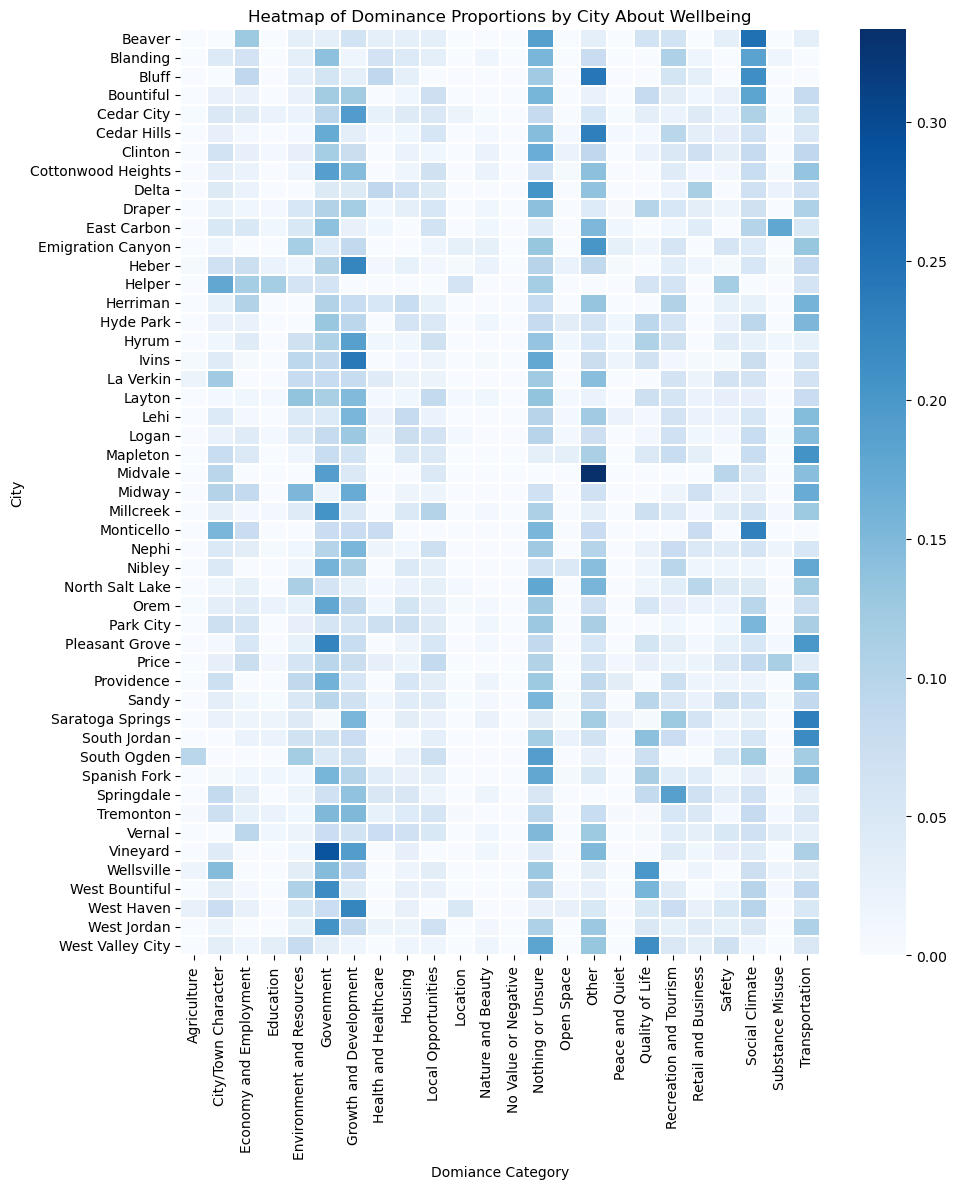

In [7]:
question_counts = comments.groupby(['var', 'City']).value_counts(['Dominance'], normalize=True).reset_index()
question_counts.columns = ['var', 'City', 'Dominance', 'text', 'proportion']
question_counts_about = question_counts.loc[question_counts['var'] == "Is there anything else you’d like to tell us about wellbeing in [your city]?", :]
heatmap_data_about = question_counts_about.pivot_table(index='City', columns='Dominance', values='proportion', aggfunc='sum')

plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data_about, cmap='Blues', linewidths=0.1)
plt.title("Heatmap of Dominance Proportions by City About Wellbeing")
plt.xlabel("Domiance Category")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# Split into Train and Test Sets 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(comments.text, comments.Dominance, test_size=0.2, random_state=42, stratify=comments.Dominance)

In [24]:
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

Dominance
Transportation               0.115606
Social Climate               0.106538
Growth and Development       0.079144
City/Town Character          0.073446
Govenment                    0.060580
Recreation and Tourism       0.058111
Safety                       0.047524
Location                     0.044581
Housing                      0.041162
Nature and Beauty            0.040308
Nothing or Unsure            0.039975
Environment and Resources    0.038788
Other                        0.037507
Local Opportunities          0.034753
No Value or Negative         0.033803
Retail and Business          0.030290
Peace and Quiet              0.029815
Economy and Employment       0.024973
Quality of Life              0.017329
Open Space                   0.016997
Health and Healthcare        0.009543
Education                    0.008593
Agriculture                  0.006172
Substance Misuse             0.004463
Name: proportion, dtype: float64

Dominance
Transportation               0.115648
Social Climate               0.106532
Growth and Development       0.079187
City/Town Character          0.073490
Govenment                    0.060577
Recreation and Tourism       0.058109
Safety                       0.047474
Location                     0.044626
Housing                      0.041208
Nature and Beauty            0.040448
Nothing or Unsure            0.039878
Environment and Resources    0.038739
Other                        0.037600
Local Opportunities          0.034751
No Value or Negative         0.033802
Retail and Business          0.030194
Peace and Quiet              0.029814
Economy and Employment       0.025066
Quality of Life              0.017281
Open Space                   0.016901
Health and Healthcare        0.009495
Education                    0.008545
Agriculture                  0.006267
Substance Misuse             0.004368
Name: proportion, dtype: float64

In [26]:
X_train.to_csv("data/X_train.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)